In [2]:
import pandas as pd
import numpy as np

file = pd.read_excel('./marketing_customer_analysis.xlsx')
file.shape

(10910, 26)

In [3]:

#standardize
cols = []
for colname in file.columns:
    cols.append(colname.lower())
file.columns = cols

file.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
file.dtypes

unnamed: 0                                int64
customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                        

In [5]:
#Check and deal with NaN values.
file.isna().sum()

unnamed: 0                          0
customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [6]:
# drop rows that have null values (only if there are very few)
file1 = file[file['state'].isna()==False]
file1.isna().sum()
file1.shape

(10279, 26)

In [7]:
file1 = file1[file1['months since last claim'].isna()==False]
file1.isna().sum()
file1.shape

(9688, 26)

In [8]:
file1 = file1[file1['vehicle class'].isna()==False]
file1.isna().sum()
file1.shape

(9134, 26)

In [9]:
file1.isna().sum()

unnamed: 0                          0
customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     4591
dtype: int64

In [10]:
file1['vehicle type'].unique()

array([nan, 'A'], dtype=object)

In [11]:
file1['vehicle type'] = file1['vehicle type'].fillna('A')
file1.isna().sum()

unnamed: 0                       0
customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [12]:
#Datetime format

month = file['effective to date'].dt.month
display(month)

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: effective to date, Length: 10910, dtype: int64

In [13]:
#Then filter the data to show only the information for the first quarter , ie. January, February and March.

file['effective to date'].dt.month < 3

0        True
1        True
2        True
3        True
4        True
         ... 
10905    True
10906    True
10907    True
10908    True
10909    True
Name: effective to date, Length: 10910, dtype: bool

In [14]:

#Show DataFrame info.

print(file1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed: 0                     9134 non-null   int64         
 1   customer                       9134 non-null   object        
 2   state                          9134 non-null   object        
 3   customer lifetime value        9134 non-null   float64       
 4   response                       9134 non-null   object        
 5   coverage                       9134 non-null   object        
 6   education                      9134 non-null   object        
 7   effective to date              9134 non-null   datetime64[ns]
 8   employmentstatus               9134 non-null   object        
 9   gender                         9134 non-null   object        
 10  income                         9134 non-null   int64         
 11  location code   

In [15]:
# Describe DataFrame.
print(file1.describe())

         unnamed: 0  customer lifetime value        income  \
count   9134.000000              9134.000000   9134.000000   
mean    5490.357675              8004.940475  37657.380009   
std     3148.183236              6870.967608  30379.904734   
min        0.000000              1898.007675      0.000000   
25%     2764.250000              3994.251794      0.000000   
50%     5508.500000              5780.182197  33889.500000   
75%     8218.750000              8962.167041  62320.000000   
max    10908.000000             83325.381190  99981.000000   

       monthly premium auto  months since last claim  \
count           9134.000000              9134.000000   
mean              93.219291                15.097000   
std               34.407967                10.073257   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000

In [16]:
file.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [17]:
# Show a plot of the total number of responses.
file1['response_numbers'] = np.where(file1['response']=='Yes', 1, 0)
file1


,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,response_numbers
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,0
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,0
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,0
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,0
10904,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,0
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,0
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,0


In [18]:
total_number_responses = file1['response_numbers'].sum()
print(total_number_responses)

1308


In [19]:
#Show a plot of the response rate by the sales channel.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
file1['response_numbers'].value_counts()

0    7826
1    1308
Name: response_numbers, dtype: int64

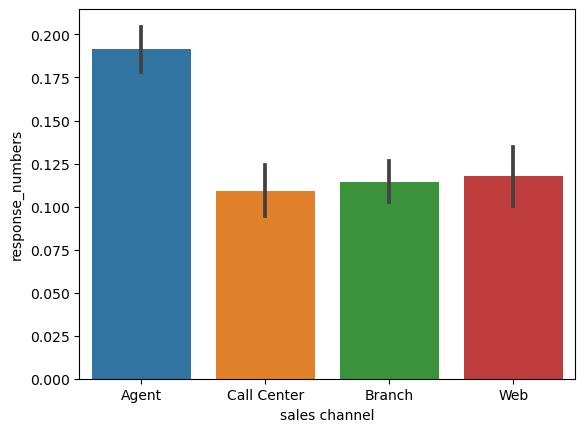

In [20]:
sns.barplot(x="sales channel", y="response_numbers", data=file1)
plt.show()

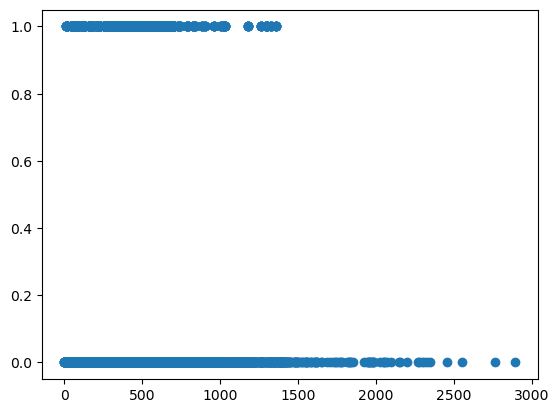

In [21]:
#Show a plot of the response rate by the total claim amount.
import matplotlib.pyplot as plt
plt.scatter(x=file1['total claim amount'], y=file1['response_numbers'])
plt.show()

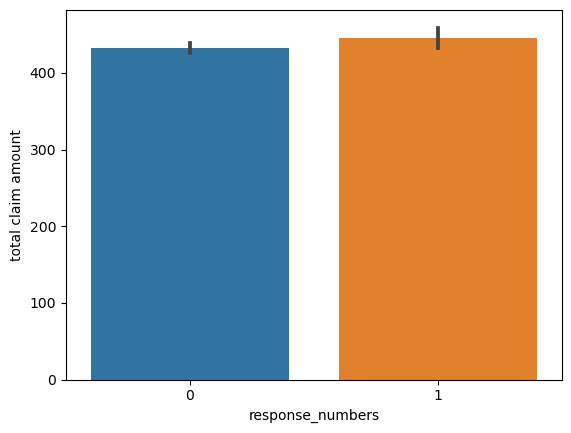

In [22]:
sns.barplot(x='response_numbers', y='total claim amount',data=file1)
plt.show()

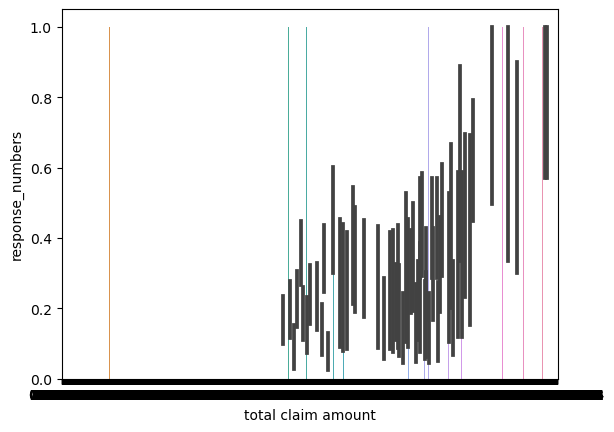

In [23]:
sns.barplot(x='total claim amount', y='response_numbers',data=file1)
plt.show()

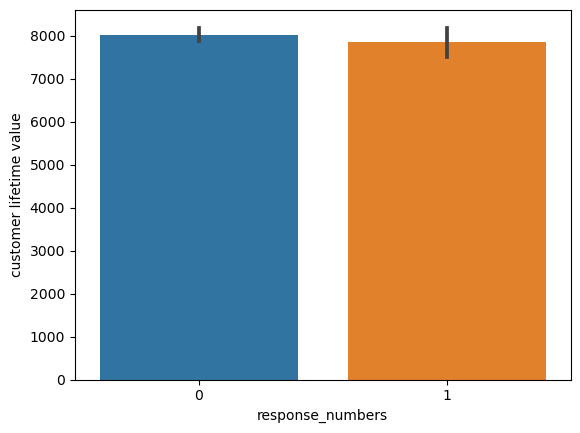

In [24]:
#Show a plot of the response rate by income.
sns.barplot(x='response_numbers', y='customer lifetime value',data=file1)
plt.show()

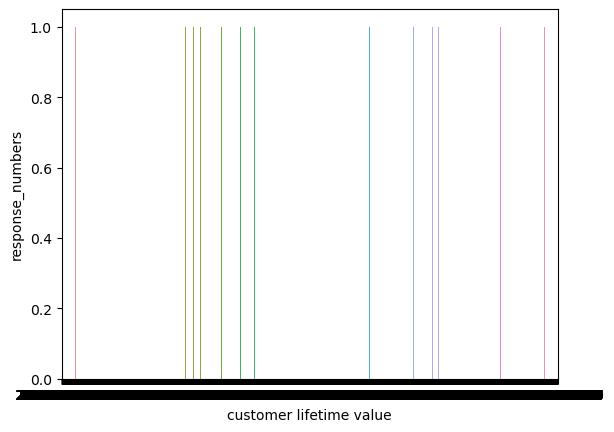

In [25]:
sns.barplot(x='customer lifetime value', y='response_numbers',data=file1)
plt.show()

In [27]:
#Round 4
#Check the data types of the columns.
file1.dtypes

unnamed: 0                                int64
customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                        

In [28]:
#Get the numeric data into dataframe called numerical
#categorical columns in a dataframe called categoricals
numerical = file1.select_dtypes(include=[np.number])
categoricals = file1.select_dtypes(include=[np.object])
display(numerical)
display(categoricals)

C:\Users\jiaxing\AppData\Local\Temp\ipykernel_9592\1478753450.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = file1.select_dtypes(include=[np.object])


,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response_numbers
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,0
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,0
...,...,...,...,...,...,...,...,...,...,...
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,0
10904,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,0
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,0
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,0


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

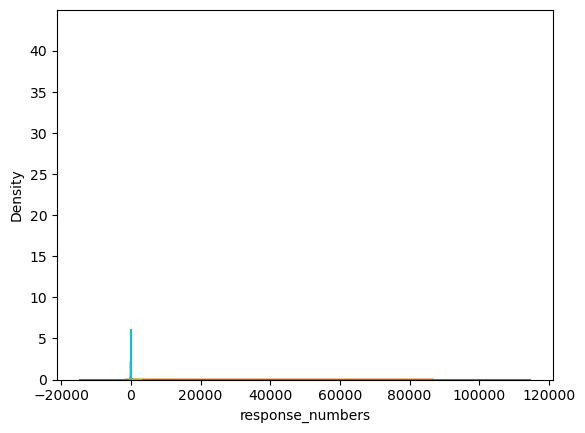

In [29]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


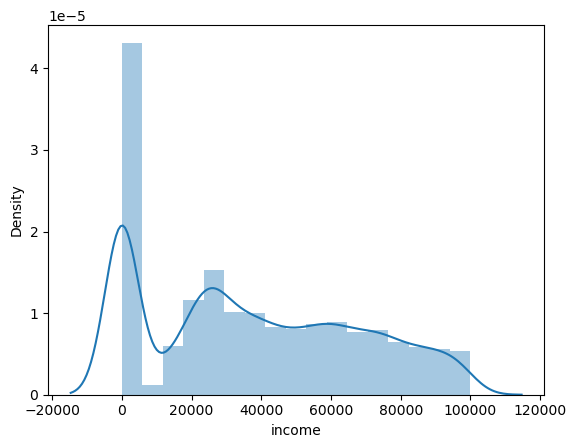

In [67]:
sns.distplot(numerical['income'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


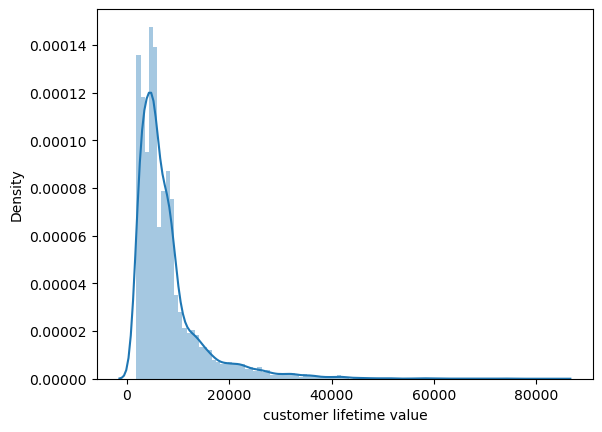

In [37]:
sns.distplot(numerical['customer lifetime value'], bins=100)
plt.show()

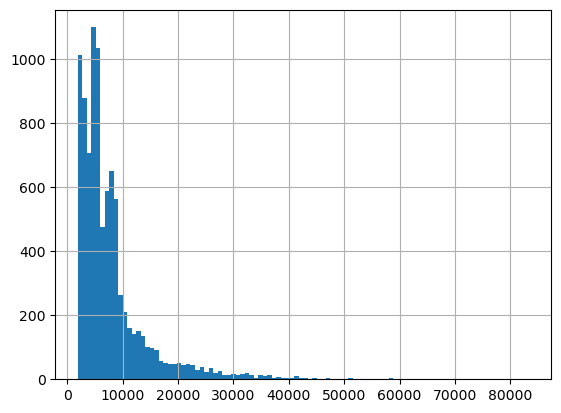

In [40]:
#Use Matplotlib to construct histograms

import matplotlib.pyplot as plt
numerical['customer lifetime value'].hist(bins=100)
plt.show()

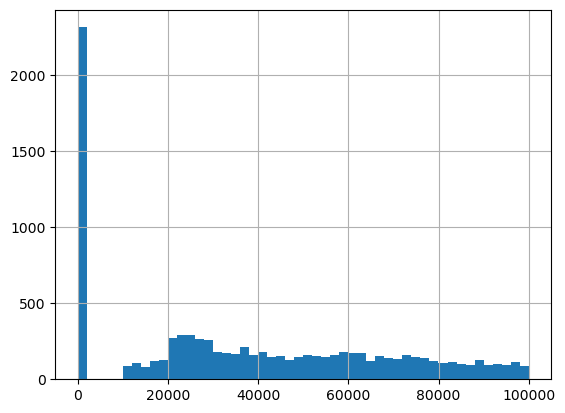

In [43]:
numerical['income'].hist(bins=50)
plt.show()

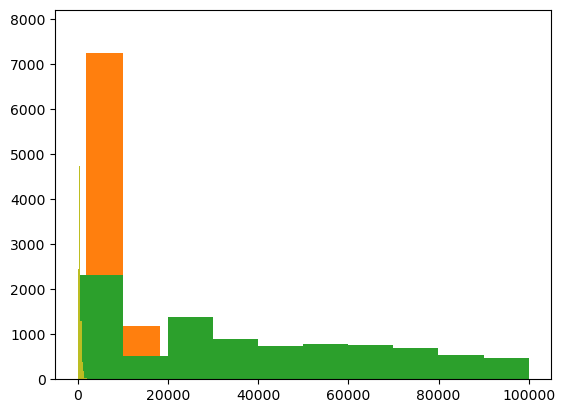

In [44]:
for column in numerical.columns:
    plt.hist(numerical[column])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


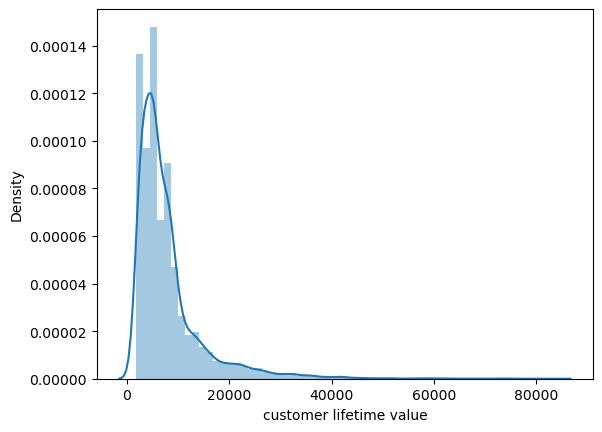

In [45]:
#Do the distributions for different numerical variables look like a normal distribution
sns.distplot(numerical['customer lifetime value'], bins=60)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


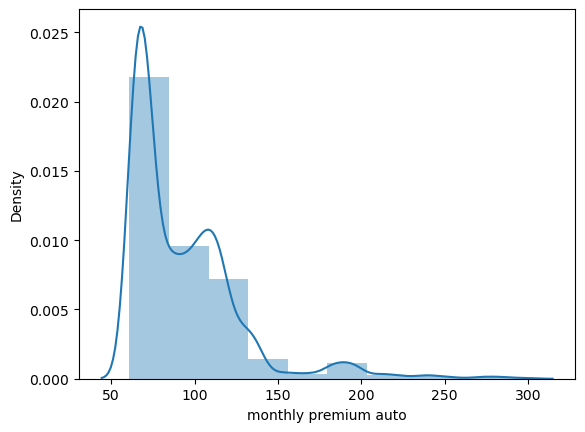

In [69]:
sns.distplot(numerical['monthly premium auto'], bins=10)
plt.show()

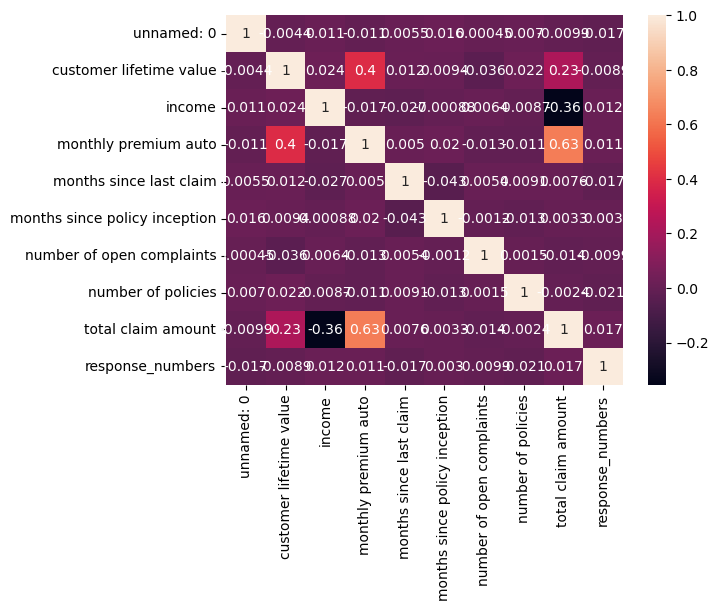

In [51]:
#check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [52]:
correlations_matrix

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,response_numbers
unnamed: 0,1.000000,-0.004350,0.010735,-0.010762,0.005453,0.015632,0.000454,0.007048,-0.009855,-0.017350
customer lifetime value,-0.004350,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
income,0.010735,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
monthly premium auto,-0.010762,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
months since last claim,0.005453,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
months since policy inception,0.015632,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
number of open complaints,0.000454,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
number of policies,0.007048,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
total claim amount,-0.009855,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
response_numbers,-0.017350,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
there are no greater than 0.9

In [ ]:
#Round 5

In [56]:
#X-y split.

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = numerical['total claim amount']
X = numerical.drop(['total claim amount'],axis=1)
lm = linear_model.LinearRegression()

In [57]:

%%time   

lm.fit(X,y)
print("b0 = " , lm.intercept_)   
print("b1 = " , lm.coef_)

b0 =  70.22090497359761
b1 =  [ 9.14089824e-05 -6.65435475e-04 -3.29512047e-03  5.34062914e+00
 -1.39552534e-01 -1.02750021e-01 -1.32651830e+00  2.81558650e-01
  1.15148879e+01]
Wall time: 11 ms


In [61]:
#Normalize (numerical).
from sklearn.preprocessing import MinMaxScaler 
y = numerical['total claim amount']
X = numerical.drop(['total claim amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

X_num

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_numbers
0,0,4809.216960,48029,61,7.0,52,0.0,9,0
1,1,2228.525238,0,64,3.0,26,0.0,1,0
2,2,14947.917300,22139,100,34.0,31,0.0,2,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,1
6,6,5035.035257,37405,63,8.0,99,3.0,4,0
...,...,...,...,...,...,...,...,...,...
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,0
10904,10904,19228.463620,0,187,14.0,32,0.0,2,0
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,0
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,0


In [62]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 9)


,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_numbers
0,0.000000,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.0
1,0.000092,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0
2,0.000183,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.0
3,0.000275,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,1.0
4,0.000550,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,0.0
...,...,...,...,...,...,...,...,...,...
9129,0.999542,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0
9130,0.999633,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,0.0
9131,0.999817,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0
9132,0.999908,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.0


In [63]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_numbers
unnamed: 0,1.000000,-0.004350,0.010735,-0.010762,0.005453,0.015632,0.000454,0.007048,-0.017350
customer lifetime value,-0.004350,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.008930
income,0.010735,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.011932
monthly premium auto,-0.010762,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.010966
months since last claim,0.005453,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.016597
months since policy inception,0.015632,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.002952
number of open complaints,0.000454,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.009881
number of policies,0.007048,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.020891
response_numbers,-0.017350,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,1.000000


In [65]:
# scaling standard scaler
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(9134, 9)


,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,response_numbers
0,-1.744072,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,-0.408822
1,-1.743754,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,-0.408822
2,-1.743437,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,-0.408822
3,-1.743119,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,2.446054
4,-1.742166,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,-0.408822
...,...,...,...,...,...,...,...,...,...
9129,1.719385,-0.761692,0.730708,-0.558602,1.479543,1.216128,3.971744,-0.822648,-0.408822
9130,1.719703,1.633560,-1.239617,2.725701,-0.108908,-0.575700,-0.422250,-0.404247,-0.408822
9131,1.720338,-0.399601,0.773205,-0.820183,-0.803856,0.714416,-0.422250,1.269358,-0.408822
9132,1.720656,2.312518,0.071749,3.132606,-0.406743,0.535234,-0.422250,-0.404247,-0.408822


In [66]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed: 0,9134.0,-8.741760e-16,1.000055,-1.744072,-0.865978,0.005763,0.866704,1.720973
customer lifetime value,9134.0,3.476284e-18,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
income,9134.0,3.462428e-16,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
monthly premium auto,9134.0,-1.183881e-17,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
months since last claim,9134.0,5.924269e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months since policy inception,9134.0,1.270667e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number of open complaints,9134.0,-1.273827e-16,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number of policies,9134.0,-2.325464e-16,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
response_numbers,9134.0,-1.239684e-15,1.000055,-0.408822,-0.408822,-0.408822,-0.408822,2.446054
